In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from pandas.tseries.offsets import MonthEnd

In [8]:
df = pd.read_csv(r'D:\BigData And DataMining\Data Mining\TimeSeris\Ktra\AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

In [9]:
start_date = df.index.min()
end_date = df.index.max() + pd.offsets.MonthEnd(0)  # cuối tháng cuối cùng
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

In [10]:
# 3. Tạo DataFrame hàng ngày với số liệu NaN
df_daily = pd.DataFrame(index=date_range)
# Gán giá trị tháng tương ứng cho ngày đầu mỗi tháng
df_month_start = df.copy()
df_month_start.index = df_month_start.index.to_period('M').to_timestamp()  # ngày đầu tháng
df_daily['Passengers'] = np.nan
df_daily.loc[df_month_start.index, 'Passengers'] = df_month_start['Passengers']

In [11]:
# 4. Nội suy số liệu hàng ngày từ dữ liệu tháng
df_daily['Passengers'] = df_daily['Passengers'].interpolate(method='linear')


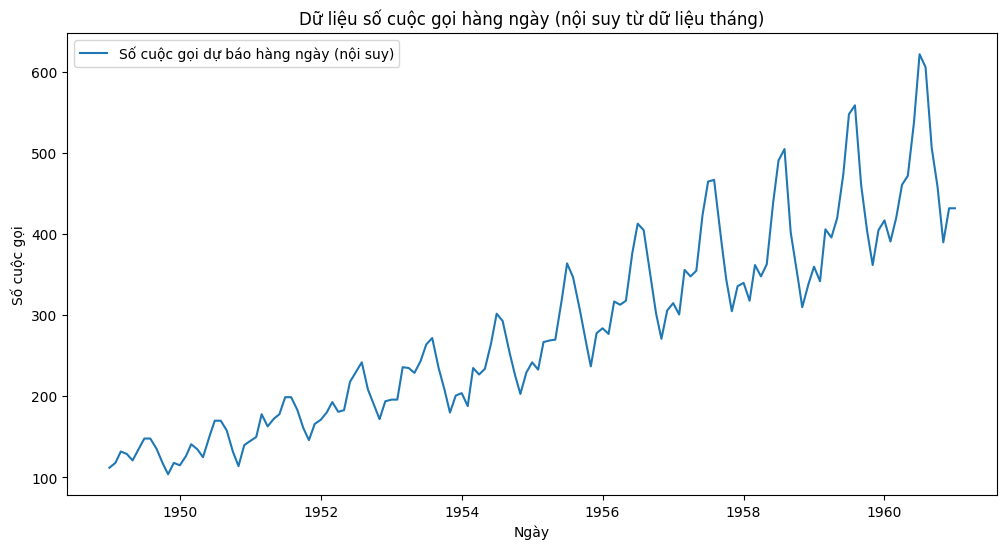

In [12]:
# 5. Trực quan hóa dữ liệu sau nội suy
plt.figure(figsize=(12,6))
plt.plot(df_daily['Passengers'], label='Số cuộc gọi dự báo hàng ngày (nội suy)')
plt.title('Dữ liệu số cuộc gọi hàng ngày (nội suy từ dữ liệu tháng)')
plt.xlabel('Ngày')
plt.ylabel('Số cuộc gọi')
plt.legend()
plt.show()

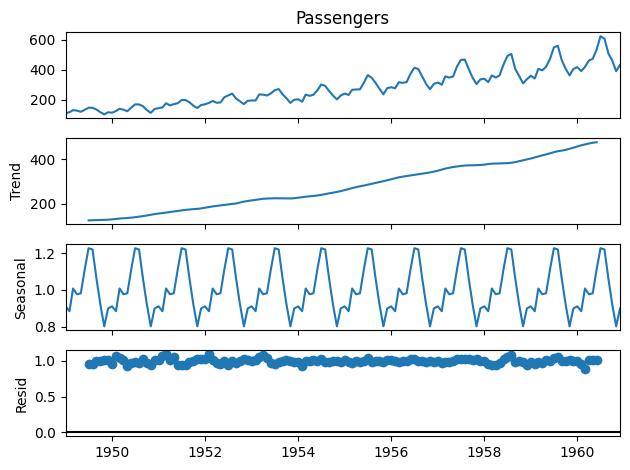

In [13]:
import statsmodels.api as sm
dec = sm.tsa.seasonal_decompose(df['Passengers'],period = 12, model = 'multiplicative').plot()
plt.show()

In [14]:
# 6. Kiểm định dừng ADF
result = adfuller(df_daily['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] > 0.05:
    print("Chuỗi không dừng, cần sai phân")
else:
    print("Chuỗi dừng, có thể dùng trực tiếp")

# 7. Nếu cần, thực hiện sai phân
if result[1] > 0.05:
    df_diff = df_daily['Passengers'].diff().dropna()
else:
    df_diff = df_daily['Passengers']

ADF Statistic: -2.3639803198759473
p-value: 0.1521617733437603
Chuỗi không dừng, cần sai phân


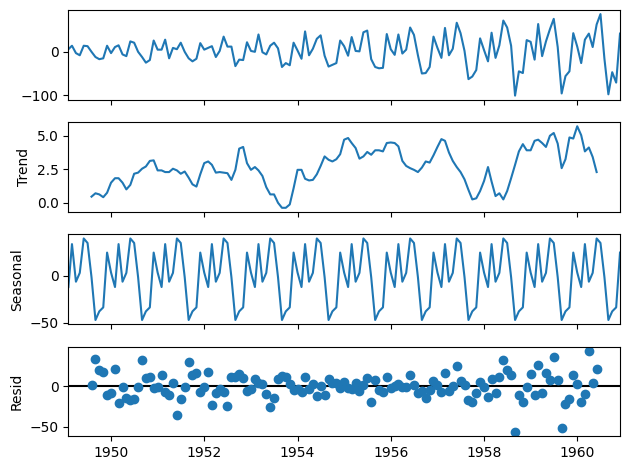

In [15]:
data_diff = df.diff().dropna()

dec = sm.tsa.seasonal_decompose(data_diff,period = 12).plot()
plt.show()

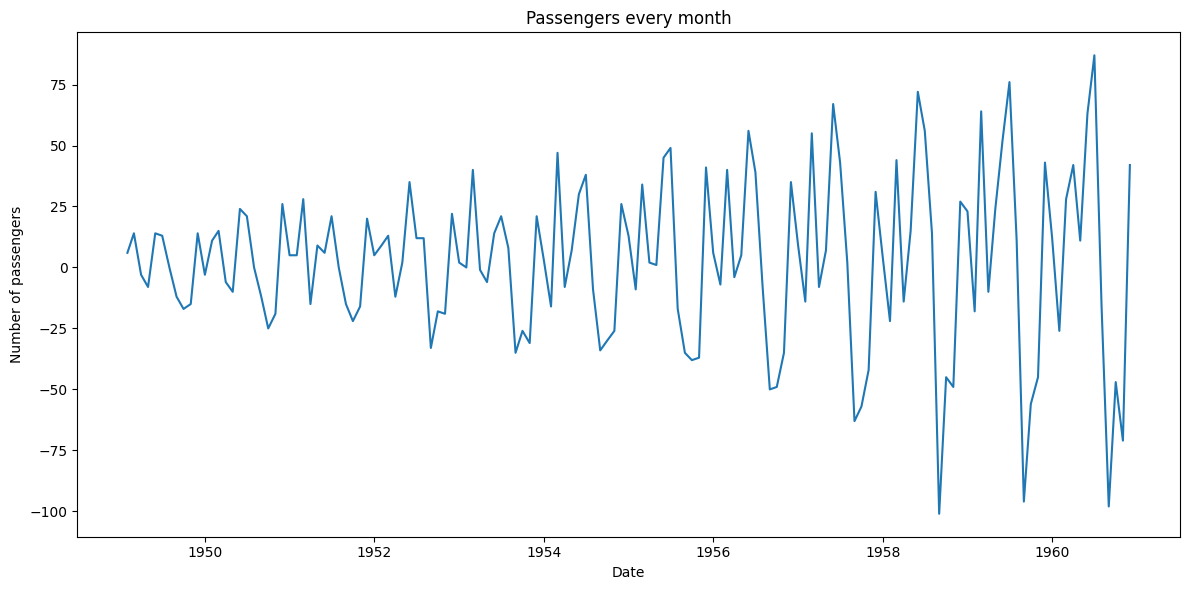

In [16]:
# show data
plt.figure(figsize=(12, 6))
plt.plot(data_diff)
plt.title('Passengers every month')
plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.tight_layout()
plt.show()

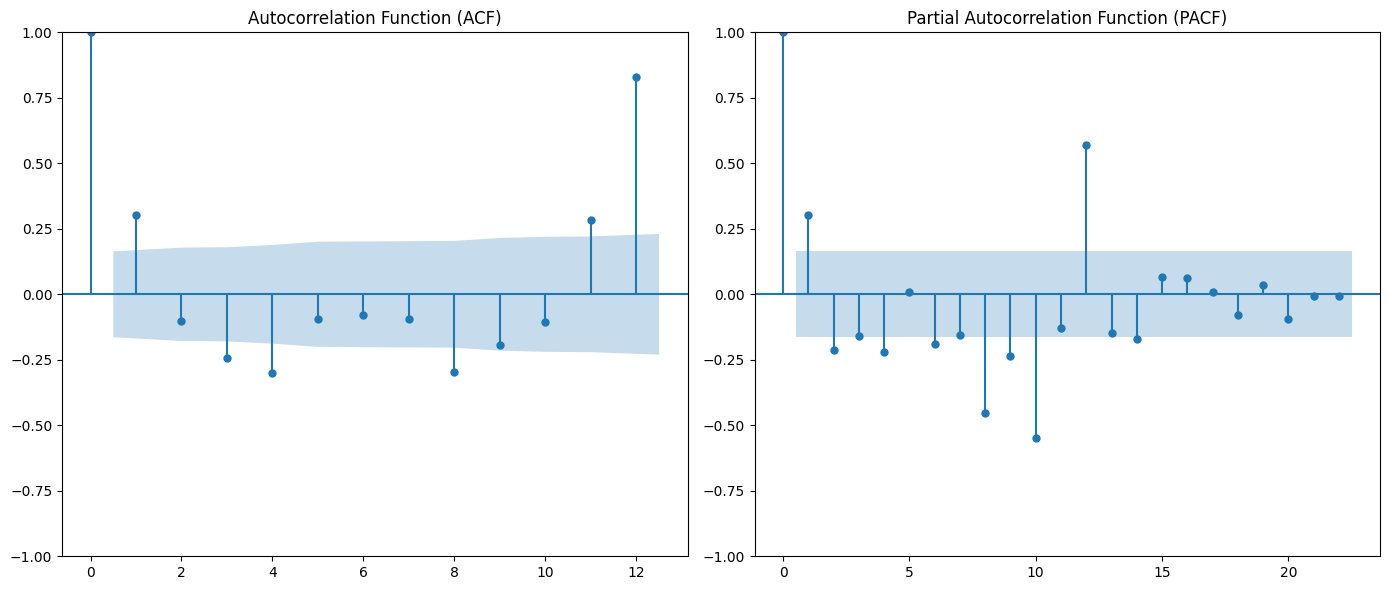

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(14, 6))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(data_diff, lags=12, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(data_diff, ax=plt.gca(), method='ywm')  # use 'ywm' or 'ols' to avoid warnings
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [18]:
size = int(len(df)-30)
train, test = df['Passengers'][0:size], df['Passengers'][size:len(df)]

print('\t SARIMA MODEL : In - Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = sm.tsa.statespace.SARIMAX(history,order = (2,1,2),seasonal_order = (0,1,1,12))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

	 SARIMA MODEL : In - Sample Forecasting 



C:\Users\HP\AppData\Local\Temp\ipykernel_25736\129904936.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 479.084682, expected = 491.000000
predicted = 490.553504, expected = 505.000000
predicted = 441.276130, expected = 404.000000
predicted = 357.274477, expected = 359.000000
predicted = 315.250711, expected = 310.000000
predicted = 347.832637, expected = 337.000000


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 344.250596, expected = 360.000000
predicted = 336.834825, expected = 342.000000
predicted = 387.591547, expected = 406.000000
predicted = 387.333484, expected = 396.000000
predicted = 408.192788, expected = 420.000000
predicted = 485.988166, expected = 472.000000
predicted = 529.031342, expected = 548.000000
predicted = 551.914002, expected = 559.000000
predicted = 459.061272, expected = 463.000000
predicted = 411.970101, expected = 407.000000
predicted = 358.421156, expected = 362.000000
predicted = 384.945733, expected = 405.000000
predicted = 420.143960, expected = 417.000000
predicted = 397.755393, expected = 391.000000
predicted = 451.335510, expected = 419.000000
predicted = 415.675179, expected = 461.000000
predicted = 465.295969, expected = 472.000000
predicted = 529.835403, expected = 535.000000
predicted = 599.299659, expected = 622.000000
predicted = 626.292199, expected = 606.000000
predicted = 513.891980, expected = 508.000000
predicted = 450.136744, expected =

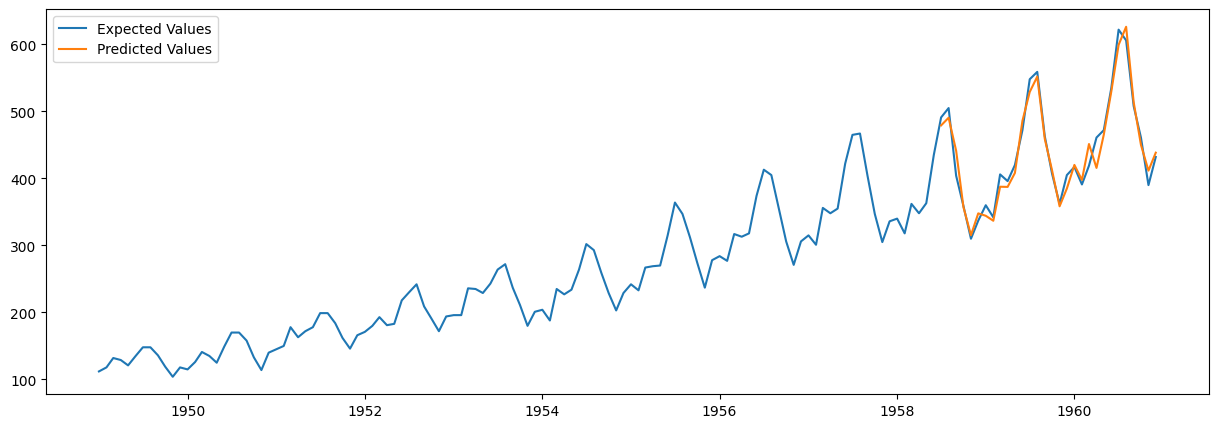

In [19]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(df['Passengers'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
error = np.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.4f' % error)

Test RMSE: 16.9253


In [21]:
# Calculate R² for original scale
r2 = r2_score(test, predictions)
print(f"R² : {r2:.4f}")

R² : 0.9521


In [22]:
forecast_steps = 7

forecast = model_fit.get_forecast(steps=forecast_steps)
mean_forecast = forecast.predicted_mean  # Giá trị dự báo
conf_int = forecast.conf_int()  # Khoảng tin cậy dự báo

print(mean_forecast)
print(conf_int)

[438.41143351 449.03922639 425.36036734 456.43949438 493.93733896
 506.21750486 568.57128547]
[[416.23176682 460.5911002 ]
 [422.90076326 475.17768951]
 [395.6871934  455.03354128]
 [424.74355509 488.13543368]
 [460.67702343 527.19765449]
 [471.85702124 540.57798848]
 [533.36405384 603.7785171 ]]


Dự báo 7 bước tiếp theo:
[438.41143351 449.03922639 425.36036734 456.43949438 493.93733896
 506.21750486 568.57128547]


C:\Users\HP\AppData\Local\Temp\ipykernel_25736\3063787931.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='M')[1:]


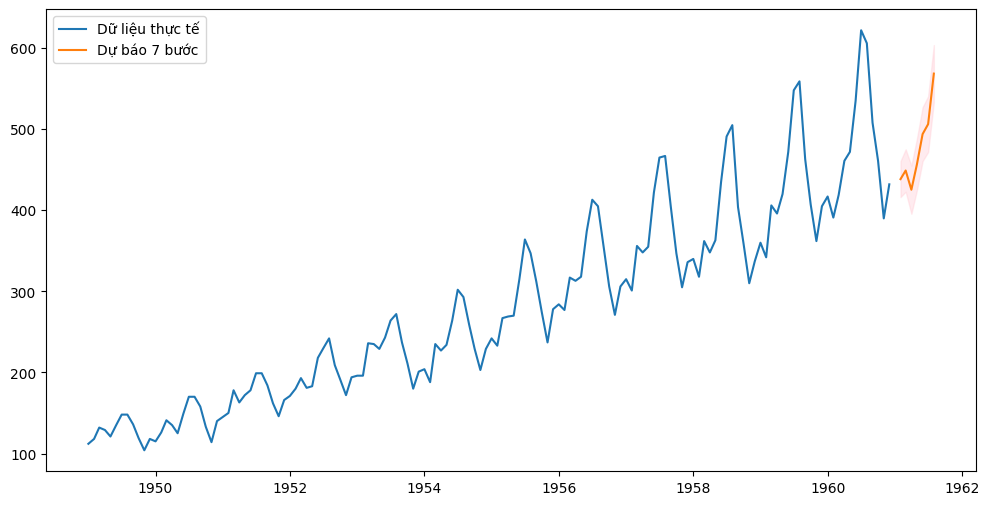

In [25]:
print("Dự báo 7 bước tiếp theo:")
print(mean_forecast)

# Vẽ dữ liệu thực tế và dự báo
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Passengers'], label='Dữ liệu thực tế')
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='M')[1:]
plt.plot(forecast_index, mean_forecast, label='Dự báo 7 bước')
plt.fill_between(
    forecast_index,
    conf_int[:, 0],
    conf_int[:, 1],
    color='pink', alpha=0.3
)
plt.legend()
plt.show()